# Project

In this project, our aim is to building a model for predicting churn. Churn is the percentage of customers that stopped using your company's product or service during a certain time frame. Thus, in the given dataset, our label will be `Churn` column.

## Steps
- Read the `churn.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Logistic Regression, Decision Trees and one other appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>Neelima Monjusha Preeti</h2>
<h2>monjusha.stu2017@juniv.edu</h2>
<h4>Deadline: 08/12/2020 9:00 GMT + 3</h4>

# Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("churn.csv")

In [3]:
x = data[data.columns[data.columns.isin(['AccountWeeks', 'ContractRenewal', 'DataPlan','DataUsage', 'CustServCalls', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins'])]].copy()
y = data['Churn'].copy()

In [4]:
x.columns

Index(['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins'],
      dtype='object')

In [5]:
data.head(10)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
5,0,118,0,0,0.00,0,223.4,98,57.0,11.03,6.3
6,0,121,1,1,2.03,3,218.2,88,87.3,17.43,7.5
7,0,147,0,0,0.00,0,157.0,79,36.0,5.16,7.1
8,0,117,1,0,0.19,1,184.5,97,63.9,17.58,8.7
9,0,141,0,1,3.02,0,258.6,84,93.2,11.10,11.2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [7]:
data.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


# Exploratory Data Analysis

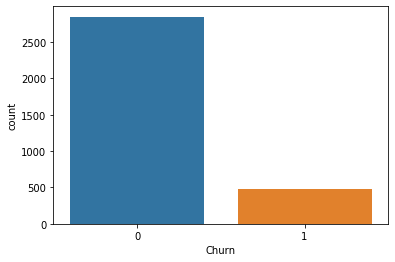

In [8]:
# Our label Distribution (countplot)
ax = sns.countplot(x='Churn',data=data)

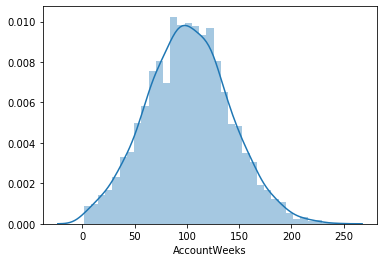

In [9]:
# Example EDA
sns.distplot(data["AccountWeeks"])

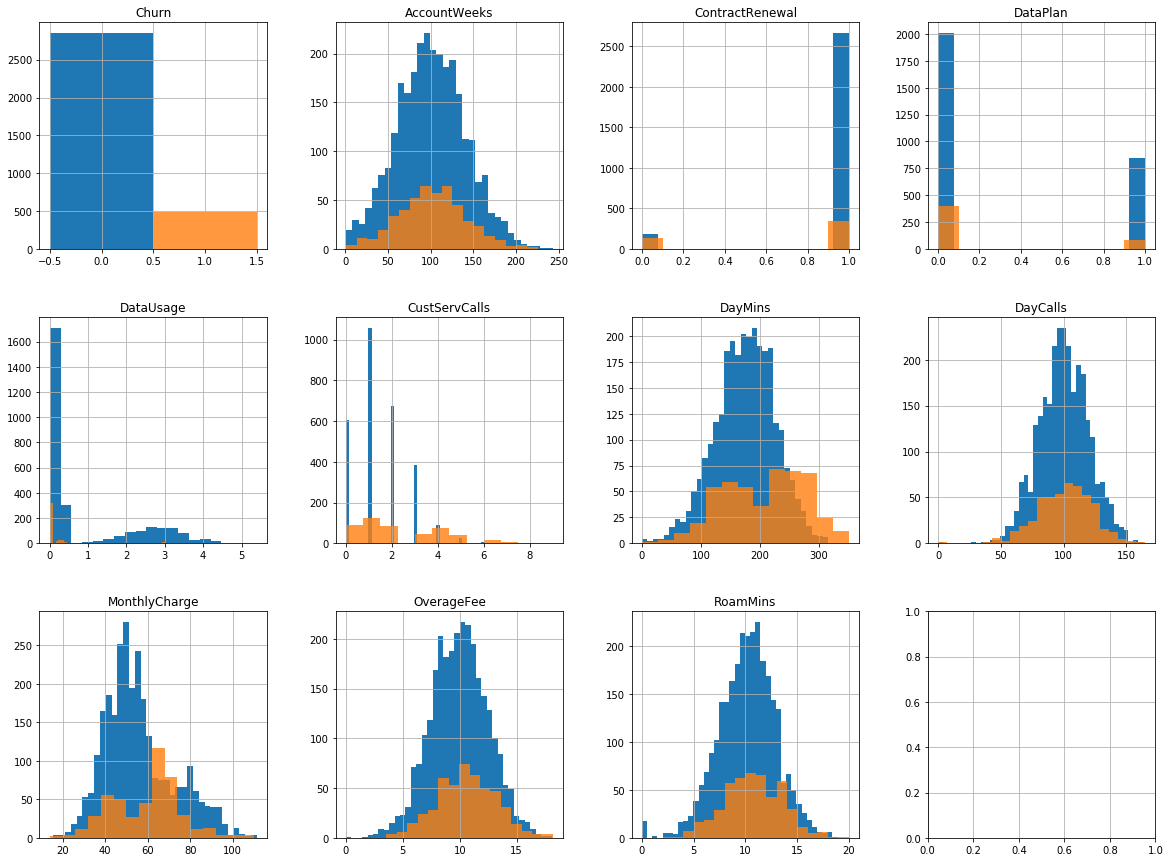

In [10]:
# Create histograms for feature columns separated by prediction label value
import pandas as pd 
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
nrows = 3; ncols = int(round(data.shape[1] / nrows, 0))
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=False, figsize=(20, 15))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
columns = data.columns
f = 0
features = []
for i in range(nrows):
    for j in range(ncols):
        if f <= data.shape[1]-1:
            labelname = columns[f]
            y0 = data[data['Churn']==0][labelname]
            ax[i, j].hist(y0, label=labelname + '-Churn', bins='auto')
            y1 = data[data['Churn']==1][labelname]
            ax[i, j].hist(y1, alpha=0.8, label=labelname + '-NoChurn', bins='auto')
            f += 1
            ax[i, j].set_title(labelname)
            features.append(labelname)
            ax[i, j].grid()
plt.grid()                        
plt.show()

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split Train and Test dataset. (0.7/0.3)

In [11]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
z

array([[0.41167182, 0.67648946, 0.32758048, ..., 1.99072703, 0.0715836 ,
        0.08500823],
       [0.41167182, 0.14906505, 0.32758048, ..., 1.56451025, 0.10708191,
        1.24048169],
       [0.41167182, 0.9025285 , 0.32758048, ..., 0.26213309, 1.57434567,
        0.70312091],
       ...,
       [0.41167182, 1.83505538, 0.32758048, ..., 0.01858065, 1.73094204,
        1.3837779 ],
       [0.41167182, 2.08295458, 3.05268496, ..., 0.38390932, 0.81704825,
        1.87621082],
       [0.41167182, 0.67974475, 0.32758048, ..., 2.66049626, 1.28129669,
        1.24048169]])

In [26]:
outliers = list(set(np.where(z >4)[0]))

len(outliers)

15

In [27]:
y.shape

(3333,)

In [28]:
new_data = data.drop(outliers,axis = 0).reset_index(drop = False)
display(new_data)

y_new = y[list(new_data["index"])]
len(y_new)

,index,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...,...
3313,3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3314,3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3315,3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3316,3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


3318

In [29]:
x_new = new_data.drop('index', axis = 1)

from sklearn.preprocessing import StandardScaler, MinMaxScaler
x_scaled = StandardScaler().fit_transform(x_new)
x_scaled

array([[-0.40824829,  0.67653864,  0.32783629, ...,  1.99414804,
        -0.07095281, -0.08610192],
       [-0.40824829,  0.14966558,  0.32783629, ...,  1.5668921 ,
        -0.10641199,  1.23834223],
       [-0.40824829,  0.90234138,  0.32783629, ..., -0.2642048 ,
        -1.5720583 ,  0.70140541],
       ...,
       [-0.40824829, -1.83238069,  0.32783629, ..., -0.02005855,
         1.7295858 ,  1.38152539],
       [-0.40824829,  2.08153347, -3.05030291, ..., -0.38627793,
        -0.81559569, -1.87589133],
       [-0.40824829, -0.6782778 ,  0.32783629, ...,  2.66555023,
         1.28043613,  1.23834223]])

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_validate

#Scaling and outlier removed
X_train, X_test, y_train, y_test = train_test_split(x_scaled,y_new, test_size=0.3, random_state=42)

models = LogisticRegression(random_state=42, n_jobs=-1)
cv = cross_validate(models,X_train,y_train,cv = 4, n_jobs=-1, return_estimator=True)

print("Mean training accuracy: {}".format(np.mean(cv['test_score'])))
print("Test accuracy: {}".format(cv["estimator"][0].score(X_test,y_test)))

Mean training accuracy: 1.0
Test accuracy: 1.0


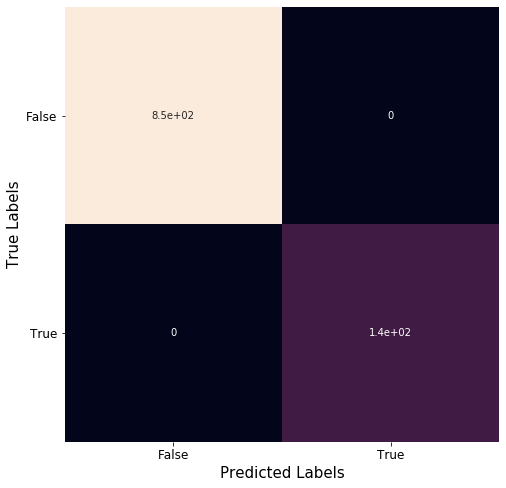

In [31]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
pred = cv["estimator"][0].predict(X_test)

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(["False","True"], fontsize = 12)
ax.yaxis.set_ticklabels(["False","True"], fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [32]:
# Without any preprocess 
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

models = LogisticRegression(random_state=42,n_jobs=-1)
cv = cross_validate(models,X_train,y_train,cv = 3, n_jobs=-1, return_estimator=True)

print("Mean training accuracy: {}".format(np.mean(cv['test_score'])))
print("Test accuracy: {}".format(cv["estimator"][0].score(X_test,y_test)))

Mean training accuracy: 0.8534070243581812
Test accuracy: 0.853


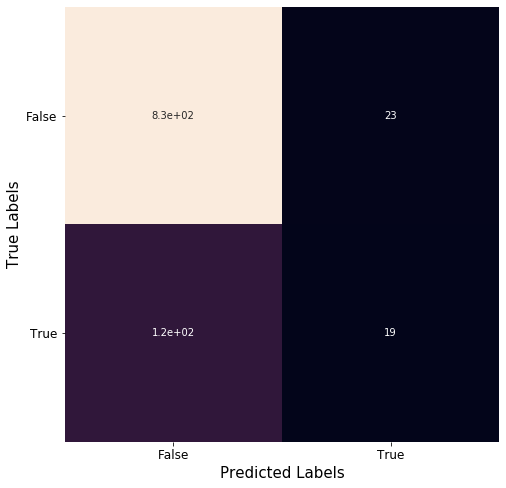

In [33]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
pred = cv["estimator"][0].predict(X_test)

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(["False","True"], fontsize = 12)
ax.yaxis.set_ticklabels(["False","True"], fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

# Analysis on preprocessing result and without preprocessing

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, cv["estimator"][0].predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       857
           1       0.45      0.13      0.21       143

    accuracy                           0.85      1000
   macro avg       0.66      0.55      0.56      1000
weighted avg       0.81      0.85      0.82      1000



In [35]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

final_model = cv["estimator"][0]

y_pred = final_model.predict(X_test)

print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))
print("F1 Score:",f1_score(y_test,y_pred))

Accuracy: 0.853
Precision: 0.4523809523809524
Recall: 0.13286713286713286
F1 Score: 0.2054054054054054


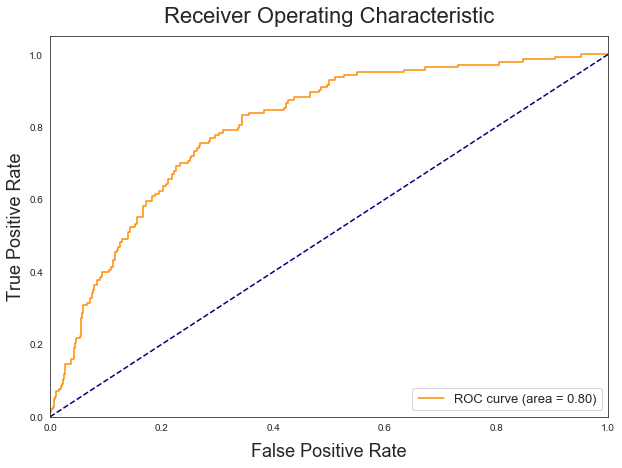

In [36]:
from sklearn.metrics import roc_curve, auc

y_pred_prop = final_model.predict_proba(X_test)[:,1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_prop)
roc_auc_log = auc(fpr_log, tpr_log)

sns.set_style("white")
plt.figure(figsize=(10, 7))
plt.plot(fpr_log, tpr_log, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc_log)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=18,labelpad =10)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Receiver Operating Characteristic',fontsize=22).set_position([.5, 1.02])
plt.legend(loc="lower right",fontsize=13)
plt.show()

# Decision Tree

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=123)

In [39]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

Accuracy of train: 0.9270040304523063
Accuracy of test: 0.9236363636363636


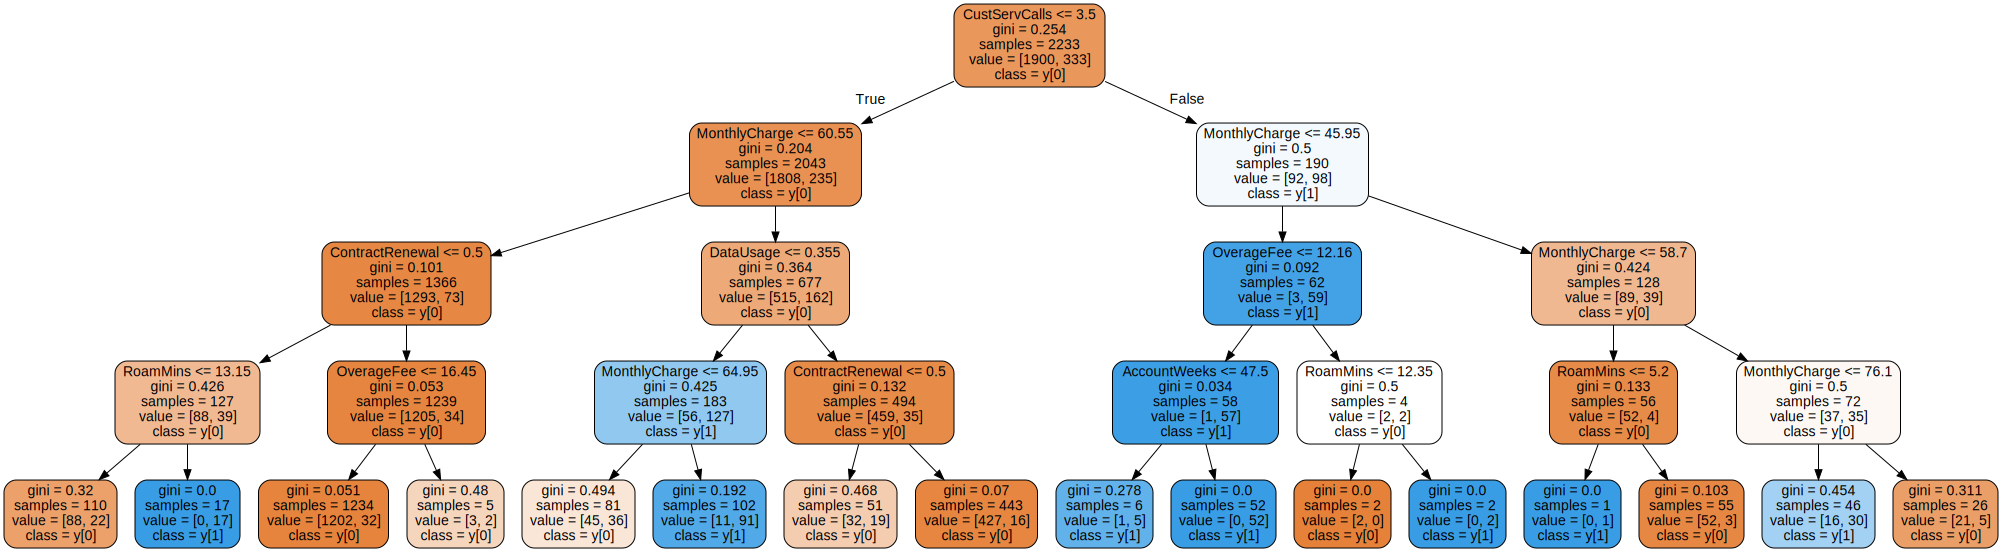

In [40]:
#Visualization

import os
from sklearn.tree import export_graphviz
# We need to locate graphiz directory for visualization (after conda)
os.environ["PATH"] += ';' + r'C:\Users\user\anaconda3\Library\bin\graphviz'

import graphviz

dot_data = export_graphviz(clf, out_file=None,
                     feature_names=x.columns,
                     class_names= True,
                     filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

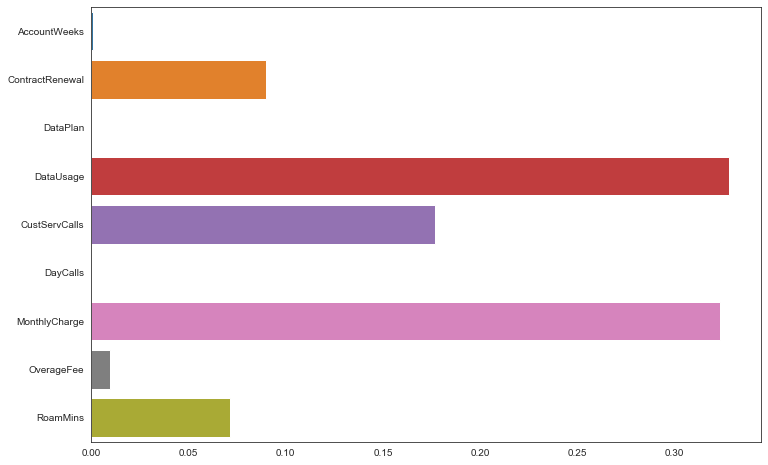

In [41]:
#Feature Importance
plt.figure(figsize=(12, 8))
importance = clf.feature_importances_
sns.barplot(x=importance, y=x.columns)
plt.show()

In [42]:
importance

array([0.00094531, 0.08973712, 0.        , 0.32802646, 0.1766271 ,
       0.        , 0.32324177, 0.00992528, 0.07149697])

In [43]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       950
           1       0.88      0.51      0.65       150

    accuracy                           0.92      1100
   macro avg       0.90      0.75      0.80      1100
weighted avg       0.92      0.92      0.91      1100



In [44]:
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.9014328063241106
Recall = 0.7508771929824561
Accuracy = 0.9236363636363636
F1 Score = 0.8021226839359598


([<matplotlib.axis.XTick at 0x2b21842eb88>,
 <a list of 2 Text xticklabel objects>)

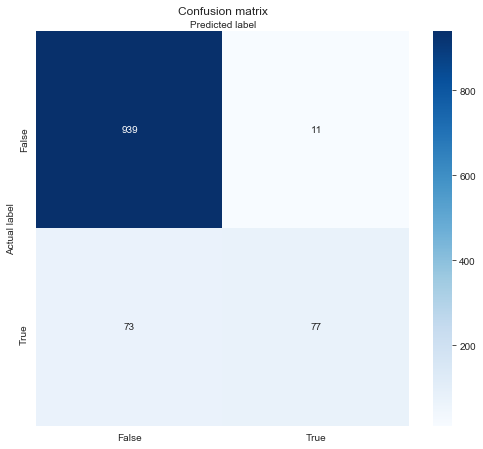

In [45]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
# Create heatmap from the confusion matrix
class_names=[False,True] 
tick_marks = [0.5, 1.5]
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="Blues", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label'); plt.xlabel('Predicted label')
plt.yticks(tick_marks, class_names); plt.xticks(tick_marks, class_names)

# XGBoost

In [46]:
import xgboost as xgb

In [47]:
dmatrix_train = xgb.DMatrix(data=X_train, label=y_train)
dmatrix_test = xgb.DMatrix(data=X_test, label=y_test)

In [48]:
param = {'max_depth':3, 
         'eta':1, 
         'objective':'multi:softprob', 
         'num_class':3}

num_round = 5
model = xgb.train(param, dmatrix_train, num_round)

In [49]:
preds = model.predict(dmatrix_test)
preds[:10]

array([[0.08928722, 0.90347624, 0.00723655],
       [0.9667116 , 0.02851957, 0.00476884],
       [0.97751176, 0.01869989, 0.00378834],
       [0.97267014, 0.02253157, 0.00479823],
       [0.97267014, 0.02253157, 0.00479823],
       [0.96438193, 0.03038002, 0.00523801],
       [0.738974  , 0.24729533, 0.01373072],
       [0.95341015, 0.04075262, 0.00583719],
       [0.8358899 , 0.15308152, 0.01102857],
       [0.97267014, 0.02253157, 0.00479823]], dtype=float32)

In [50]:
best_preds = np.asarray([np.argmax(line) for line in preds])

In [51]:
best_preds

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

# Metrics

In [52]:
print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 0.9152272123305873
Recall = 0.8070175438596492
Accuracy = 0.9381818181818182


([<matplotlib.axis.XTick at 0x2b218728048>,
 <a list of 2 Text xticklabel objects>)

<Figure size 864x576 with 0 Axes>

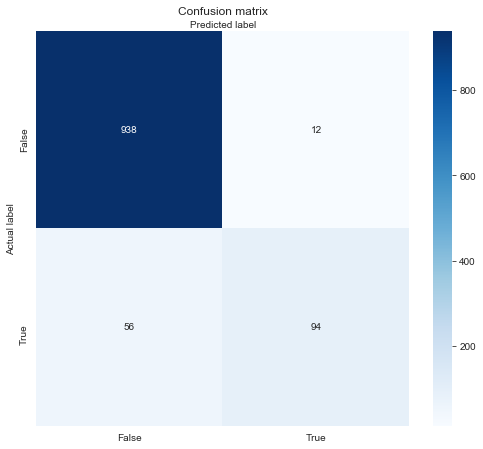

In [53]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, best_preds)
# Create heatmap from the confusion matrix
class_names=[False,True] 
tick_marks = [0.5, 1.5]
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="Blues", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label'); plt.xlabel('Predicted label')
plt.yticks(tick_marks, class_names); plt.xticks(tick_marks, class_names)

In [ ]:
## Hyperparameter Tuning

from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  

param_dict = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'learning_rate': [0.001,0.01,0.1,1],
    'n_estimators': [190,200,210,500,1000]
    
}

xgc = XGBClassifier(booster='gbtree', learning_rate =0.01, n_estimators=200, max_depth=5,num_class=2,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=27)

clf = GridSearchCV(xgc,param_dict,cv=3,n_jobs = -1).fit(X_train,y_train)

print("Tuned: {}".format(clf.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(clf.best_score_))
print("Train Score {:.6f}".format(clf.score(X_train,y_train)))
print("Test Score {:.6f}".format(clf.score(X_test,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(clf.refit_time_))

In [ ]:
from sklearn.metrics import confusion_matrix
xgb_pred = clf.predict(X_test)

plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test,xgb_pred)
# Create heatmap from the confusion matrix
class_names=[False,True] 
tick_marks = [0.5, 1.5]
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="Blues", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label'); plt.xlabel('Predicted label')
plt.yticks(tick_marks, class_names); plt.xticks(tick_marks, class_names)

# Which Model performed best 